Question 1:
 
A retail store wants to identify customers who make frequent purchases. Given the dataset below, write a code to:
1.	Group customers by their IDs.
2.	Calculate the total number of purchases per customer.
3.	Identify the top 3 frequent customers.
Dataset:
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}


In [1]:
import pandas as pd

data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
df = pd.DataFrame(data)

In [2]:
df

,Customer_ID,Purchase_Amount
0,101,200
1,102,150
2,103,180
3,101,220
4,104,300
5,102,200
6,101,100
7,105,400
8,102,250
9,103,300


In [3]:
group_by_ids = df.groupby(df['Customer_ID'])

In [4]:
group_by_ids.groups

{101: [0, 3, 6], 102: [1, 5, 8], 103: [2, 9], 104: [4], 105: [7]}

In [5]:
pd.DataFrame([
    {'Customer_ID': k}
    for k, v in group_by_ids.groups.items()
])


,Customer_ID
0,101
1,102
2,103
3,104
4,105


In [6]:
unique_cust = df['Customer_ID'].unique().tolist()
unique_cust

[101, 102, 103, 104, 105]

In [7]:
cust_purc = df[df['Customer_ID'] == 101]
cust_purc

,Customer_ID,Purchase_Amount
0,101,200
3,101,220
6,101,100


In [8]:
z =pd.DataFrame( columns=['Customer_ID','Purchased'])
z['Customer_ID']=unique_cust

amount=[]
for v in unique_cust:
    # print(df[df['Customer_ID'] == v]['Purchase_Amount'].tolist())
    data_c = df[df['Customer_ID'] == v]['Purchase_Amount'].tolist()
    # print(sum(data_c))
    amount.append(sum(data_c))
    
z['Purchased']=amount
print('Total Purchases per Customer:')
z

Total Purchases per Customer:


,Customer_ID,Purchased
0,101,520
1,102,600
2,103,480
3,104,300
4,105,400


In [9]:
find_t3_data = {'Customer_ID': unique_cust, 'Purchased': amount}

In [10]:
t3=pd.DataFrame(find_t3_data)
t3.sort_values(by='Purchased', ascending=False).head(3)

,Customer_ID,Purchased
1,102,600
0,101,520
2,103,480


Question 2:
A company tracks the daily sales of a product over a month. You are tasked with identifying any abnormal sales data using the IQR (Interquartile Range) method.
Dataset (Daily Sales in Units):

data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}
<br>
Tasks:<br>
1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).<br>
2. Determine the IQR.<br>
3. Identify the Lower Bound and Upper Bound.<br>
4. Detect and display the outliers.<br>
5. Replace the Outliers with the Median Value.<br>


In [11]:
Q2data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

In [12]:
Q2df = pd.DataFrame(Q2data)
Q2df

,Day,Sales
0,1,25
1,2,30
2,3,28
3,4,45
4,5,55
5,6,60
6,7,22
7,8,80
8,9,95
9,10,120


In [13]:
'''1.  Calculate the Q1 (25th percentile) and Q3 (75th percentile)'''
import numpy as np
Q1 = np.percentile(Q2df['Sales'], 25)
Q3 = np.percentile(Q2df['Sales'], 75)
print('Q1',Q1)
print('Q3',Q3)

Q1 31.5
Q3 83.75


In [14]:
'''2. Determine the IQR.'''
IQR = Q3 - Q1
print('IQR',IQR)

IQR 52.25


In [15]:
'''3. Identify the Lower Bound and Upper Bound.'''
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('lower_bound',lower_bound)
print('upper_bound',upper_bound)

lower_bound -46.875
upper_bound 162.125


In [16]:
'''4. Detect and display the outliers.'''
sales_data = Q2df['Sales'].tolist()
lower_bound_ol=[]
upper_bound_ol=[]

for val in sales_data:
    # print(val)
    # print(type(val))
    if val > upper_bound:
        upper_bound_ol.append(val)

    if val < lower_bound:
        lower_bound_ol.append(val)

print('lower bound outliers',lower_bound_ol)
print('upper bound outliers',upper_bound_ol)

lower bound outliers []
upper bound outliers [200]


In [17]:
'''5. Replace the Outliers with the Median Value.'''
Q2df_median = np.median(Q2df['Sales'])
print('Q2df_median',Q2df_median)

Q2df.loc[
    (Q2df['Sales'] < lower_bound) | (Q2df['Sales'] > upper_bound),
    'Sales'
] = Q2df_median
Q2df

Q2df_median 43.0


,Day,Sales
0,1,25
1,2,30
2,3,28
3,4,45
4,5,55
5,6,60
6,7,22
7,8,80
8,9,95
9,10,120


Question 3:
 
A pharmaceutical company is testing the effectiveness of a new drug to reduce blood pressure. Two groups of patients were selected:
Group 1 (Treatment): Received the drug
Group 2 (Control): Received a placebo
The company wants to check if there is a significant difference in the blood pressure levels between the two groups using an Independent T-Test.
Dataset:
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
Tasks: <br>
1.	Perform an Independent T-Test.<br>
2.	State the null and alternative hypotheses.<br>
3.	Calculate the p-value.<br>
4.	Conclude whether the drug has a significant effect.<br>
Expected Output:<br>
T-Statistic: -11.870553692962726<br>
P-Value: 6.008066605173374e-10<br>
Reject the Null Hypothesis: The drug has a significant effect.<br>


In [18]:
Q3data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
Q3df = pd.DataFrame(Q3data)
Q3df

,Group,Blood_Pressure
0,Treatment,120
1,Treatment,115
2,Treatment,118
3,Treatment,123
4,Treatment,122
5,Treatment,119
6,Treatment,124
7,Treatment,117
8,Treatment,116
9,Treatment,121


In [19]:
from scipy.stats import ttest_ind
drug_group=Q3df[Q3df['Group'] == 'Treatment' ]
# print(drug_group)
control_group=Q3df[Q3df['Group'] == 'Control' ]
# print(control_group)

t_stat, p_value = ttest_ind(drug_group['Blood_Pressure'], control_group['Blood_Pressure'], equal_var=False)
print('T-Statistic:',t_stat)
print('p_value:',p_value)
if p_value < 0.05:
    print("Reject the null hypothesis. The drug has a significant effect.")
else:
    print("Fail to reject the null hypothesis. The drug has a no significant effect.")


T-Statistic: -11.870553692962728
p_value: 8.638671864752514e-10
Reject the null hypothesis. The drug has a significant effect.


Question 4:
GlobalMart is a large retailer conducting advertisement campaigns in different regions. The company spends money on two types of advertisements: TV Ads and Social Media Ads
They want to analyze how these ads influence their sales.
Your task is to calculate the Covariance and Correlation to determine which type of ad has a stronger impact on sales.
Tasks :
1.	Calculate the Covariance between ad budgets and sales to measure the direction of the relationship.
2.	Calculate the Correlation to measure the strength of the relationship.
3.	Determine which type of ad is more effective for increasing sales.


In [21]:

Q4data = {
    "Region": ["North", "South", "East", "West", "Central"],
    "TV_Ad_Budget": [200, 300, 400, 500, 600],
    "Social_Media_Budget": [150, 250, 300, 450, 500],
    "Sales": [20, 35, 50, 60, 80]
}

Q4df = pd.DataFrame(Q4data)

Q4df


,Region,TV_Ad_Budget,Social_Media_Budget,Sales
0,North,200,150,20
1,South,300,250,35
2,East,400,300,50
3,West,500,450,60
4,Central,600,500,80


In [22]:
cov_tv_sales = Q4df["TV_Ad_Budget"].cov(Q4df["Sales"])
cov_social_sales = Q4df["Social_Media_Budget"].cov(Q4df["Sales"])

print("Covariance (TV Ads & Sales):", cov_tv_sales)
print("Covariance (Social Media Ads & Sales):", cov_social_sales)

Covariance (TV Ads & Sales): 3625.0
Covariance (Social Media Ads & Sales): 3225.0


In [23]:
corr_tv_sales = Q4df["TV_Ad_Budget"].corr(Q4df["Sales"])
corr_social_sales = Q4df["Social_Media_Budget"].corr(Q4df["Sales"])

print("Correlation (TV Ads & Sales):", corr_tv_sales)
print("Correlation (Social Media Ads & Sales):", corr_social_sales)

Correlation (TV Ads & Sales): 0.9958640886279954
Correlation (Social Media Ads & Sales): 0.9724846021568381


In [24]:
if corr_social_sales > corr_tv_sales:
    print("Social Media Ads have a stronger impact on Sales.")
else:
    print("TV Ads have a stronger impact on Sales.")


TV Ads have a stronger impact on Sales.


Question 5:
A company tracks the delivery time (in minutes) for its online orders. You are given the delivery times for 50 orders.
●	Calculate the mean and standard deviation of the delivery times.
●	Plot the Probability Density Function (PDF) to visualize the distribution.
Dataset (Delivery Times in Minutes):
 
[25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]


Mean Delivery Time: 65.0625
Standard Deviation: 41.718504212759115


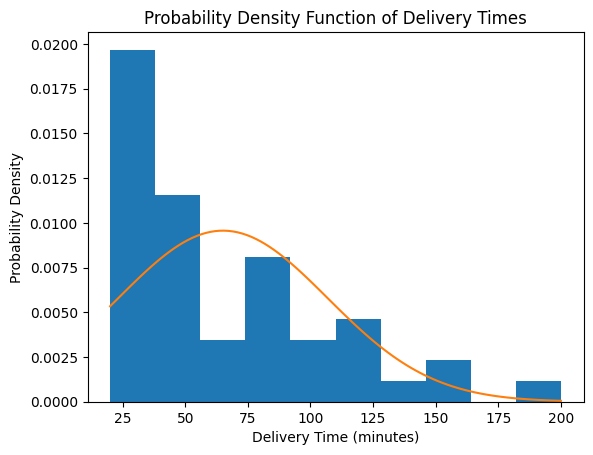

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import norm


delivery_times = np.array([
    25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
    33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
    30, 34, 31, 33, 36, 42, 44, 48, 90, 200,
    20, 25, 27, 32, 38, 41, 47, 58, 62, 77,
    80, 84, 90, 110, 123, 145, 150, 160
])


mean_time = np.mean(delivery_times)
std_time = np.std(delivery_times)

print("Mean Delivery Time:", mean_time)
print("Standard Deviation:", std_time)


x = np.linspace(delivery_times.min(), delivery_times.max(), 100)
pdf = norm.pdf(x, mean_time, std_time)

plt.figure()
plt.hist(delivery_times, bins=10, density=True)
plt.plot(x, pdf)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Probability Density")
plt.title("Probability Density Function of Delivery Times")
plt.show()